<img src="https://www.websoptimization.com/blog/wp-content/uploads/2018/05/cryptocurrency-1.jpg">

<center><h1>Cryptocurrency Data Exploration</h1></center>

## Overview

The First cryptocurrency, Bitcoin was launched by the alias Satoshi Nakamoto in early 2009. A cryptocurrency is a digital currency that uses cryptography for security, preventing counterfeiting. Built on a distributed blockchain ledger, it is enforced via a decentralized computer network, not a central authority, rendering it theoretically immune to government interference or manipulation.

A great basic description of terms is as follows:
- A Honda is a Car. Cars are powered by Engines (the underlying technology)
- Bitcoin is a Cryptocurrency. Cryptocurrencies are powered by blockchain (the underlying technology)

## Data

With a userbase of ˜50 million global users, cryptocurrency has been a hot topic in recent years and the dataset we will be working with is a daily history of cryptocurrency. This data was collected on May 21, 2018, and contains daily data on 2,071 cryptocurrencies.

The dataset consists of 1 table housed in a .csv file. The file contains a slug, symbol, name, date, ranknow, open, high, low, close, volume, market, close_ratio, and spread for each cryptocurrency, for each date of existence.

One challenge of this dataset is that cryptocurrencies weren't all created at one point in time. They have different date ranges and there are even more being created to this day. At the time of this dataset, it was a representation of all cryptocurrencies in existence. Although the market has expanded rapidly in the past year to now over 3,000 cryptocurrencies, for our purposes we will explore this dataset as an accurate representation of cryptocurrencies as a whole, due to the fact that the majority of newly formed cryptocurrencies(within the last year) are likely to be low outliers in our data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
# import dataset
cryptos = pd.read_csv('crypto-markets.csv')

# verify number of cryptos we are working with
print('There are '+ str(len(cryptos['name'].unique())) + ' cryptocurrencies in this dataset.\n')

# visualize what the differnt data types are
print(cryptos.dtypes)

There are 2071 cryptocurrencies in this dataset.

slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object


The date column is showing as an object in YYYY-MM-DD format. This will cause us issues later in the analysis so we need to create some new columns to avoid headaches later down the line.

In [3]:
# create new columns
cryptos['datetime'] = cryptos['date'].astype('datetime64')
cryptos['year_obj'] = cryptos['date'].str[:4]
cryptos['month_obj'] = cryptos['date'].str[5:7]
cryptos['day_obj'] = cryptos['date'].str[8:10]
cryptos['year'] = cryptos['year_obj'].astype('int')
cryptos['month'] = cryptos['month_obj'].astype('int')
cryptos['day'] = cryptos['day_obj'].astype('int')
cryptos['price'] = cryptos['close'].astype('int')

print(cryptos.dtypes)

slug                   object
symbol                 object
name                   object
date                   object
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
market                float64
close_ratio           float64
spread                float64
datetime       datetime64[ns]
year_obj               object
month_obj              object
day_obj                object
year                    int64
month                   int64
day                     int64
price                   int64
dtype: object


Now that we have our dates in int type and multiple options of how we can select/filter on them, let's move on to our analytical questions.

## Analytic Questions

#### #1 What are the oldest cryptocurrencies in our data? Are there any outliers?

For our purposes, we are defining oldest as the number of days a cryptocurrency has been in existence in our dataset. Since different cryptocurrencies were being created in different years, we should look to see if any cryptocurrencies have significantly more data than others in our dataset. Knowing that the first cryptocurrency was created in 2009 and our dataset begins in 2013 we should have enough of a starting base to not worry about one dominating the others in terms of existence.

Text(0, 0.5, 'Records')

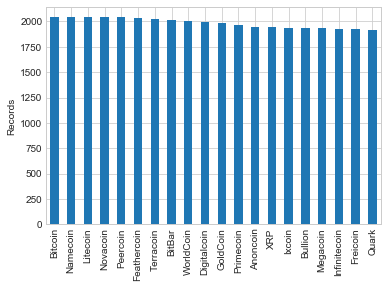

In [4]:
cryptos.name.value_counts().head(20).plot(kind='bar')
plt.ylabel('Records')

Text(0, 0.5, 'Records')

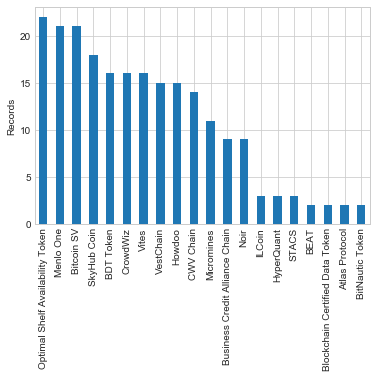

In [5]:
cryptos.name.value_counts().tail(20).plot(kind='bar')
plt.ylabel('Records')

As we anticipated, no major outliers exist on the high end. The low end, however, is a different story. There is some pretty steep drop off, not to mention our oldest cryptos have an excess of 2,000 days and some of the newest have less than 5 days in our dataset.

Let's find out where the first real drop-off in age occurs.

In [6]:
cryptos.name.value_counts().describe()

count    2071.000000
mean      454.996137
std       462.486081
min         2.000000
25%       121.000000
50%       314.000000
75%       535.000000
max      2042.000000
Name: name, dtype: float64

With the max at 2042 and the 75 percentile at 535, we know that the drop off occurs somewhere in the top 25% of our data. Lets graph that top 25% out and see if we can narrow it down further.

Text(0, 0.5, 'Records')

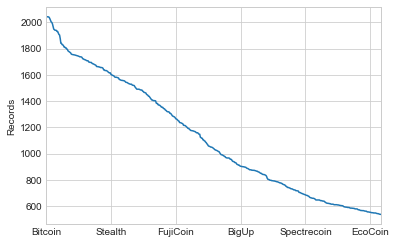

In [7]:
top_25 = int(2071 * 0.25)

cryptos.name.value_counts().head(top_25).plot(kind='line')
plt.ylabel('Records')

There is a small section that drops from the 2000+ range to just below the 1800 range. After the 1800 range, it is less severe but still in decline. Leading to believe that the entire top 25% of the data is the drop. Interpreting what that might mean brings us to question 2.

#### #2 What are the cryptocurrencies in existance? When did they come into existance?

Lets first isolate the cryptocurrencies by year.

In [8]:
#2104
crypto_2013 = cryptos[cryptos.year == 2013]
total_13 = crypto_2013['name'].nunique()
new_13 = 0
exist_13 = total_13 - new_13

#2104
crypto_2014 = cryptos[cryptos.year == 2014]
total_14 = crypto_2014['name'].nunique()
new_14 = total_14 - total_13
exist_14 = total_14 - new_14

#2015
crypto_2015 = cryptos[cryptos.year == 2015]
total_15 = crypto_2015['name'].nunique()
new_15 = total_15 - total_14
exist_15 = total_15 - new_15

#2016
crypto_2016 = cryptos[cryptos.year == 2016]
total_16 = crypto_2016['name'].nunique()
new_16 = total_16 - total_15
exist_16 = total_16 - new_16

#2017
crypto_2017 = cryptos[cryptos.year == 2017]
total_17 = crypto_2017['name'].nunique()
new_17 = total_17 - total_16
exist_17 = total_17 - new_17

#2018
crypto_2018 = cryptos[cryptos.year == 2018]
total_18 = crypto_2018['name'].nunique()
new_18 = total_18 - total_17
exist_18 = total_18 - new_18

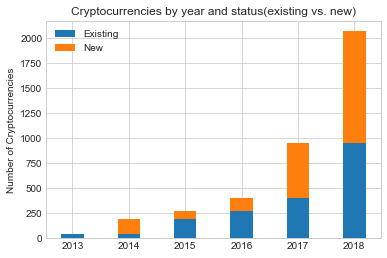

In [9]:
N = 6
existing = (exist_13, exist_14, exist_15, exist_16, exist_17, exist_18)
new = (new_13, new_14, new_15, new_16, new_17, new_18)
ind = np.arange(N)
width = 0.40

p1 = plt.bar(ind, existing, width)
p2 = plt.bar(ind, new, width, bottom=existing)

plt.ylabel('Number of Cryptocurrencies')
plt.title('Cryptocurrencies by year and status(existing vs. new)')
plt.xticks(ind, ('2013', '2014', '2015', '2016', '2017', '2018'))
plt.yticks(np.arange(0, 2100, 250))
plt.legend((p1[0], p2[0]), ('Existing', 'New'))

plt.show()

After analyzing the amount of data for each year. I discovered there were just too many cryptocurrencies to list out, so I decided to display totals for the year. What cryptos were already in existence from the year prior and what cryptos were new. The above bar chart is an example of how explosive the growth has been in recent years.

#### #3 Do cryptocurrencies follow the same price change trend?

For cryptocurrencies, 2017 was a record year. The prices went through the roof. There was a huge spike toward the end of the year, the likes of which they had never seen. So let's analyze 2017. To see if the top cryptocurrencies all experience the same spike and do they follow each other?

Let's isolate some of the top cryptocurrencies and see.

In [10]:
# isolate 2017
coin_2017 = cryptos.loc[cryptos['year'] == 2017]
coin_2017[coin_2017['name'] == 'Bitcoin']

coin = coin_2017[coin_2017['name'] == 'Bitcoin']
coin2 = coin_2017[coin_2017['name'] == 'Bitcoin Cash']
coin3 = coin_2017[coin_2017['name'] == 'Ethereum']
coin4 = coin_2017[coin_2017['name'] == 'Litecoin']
coin5 = coin_2017[coin_2017['name'] == 'Maker']

coin.index = pd.to_datetime(10000 * coin.year + 100 * coin.month + coin.day, format='%Y%m%d')
coin_by_date = coin.pivot_table('price', [coin.index.month, coin.index.day])
coin_by_date.index = [pd.datetime(2017, month, day) for (month, day) in coin_by_date.index]

coin2.index = pd.to_datetime(10000 * coin2.year + 100 * coin2.month + coin2.day, format='%Y%m%d')
coin2_by_date = coin2.pivot_table('price', [coin2.index.month, coin2.index.day])
coin2_by_date.index = [pd.datetime(2017, month, day) for (month, day) in coin2_by_date.index]

coin3.index = pd.to_datetime(10000 * coin3.year + 100 * coin3.month + coin3.day, format='%Y%m%d')
coin3_by_date = coin3.pivot_table('price', [coin3.index.month, coin3.index.day])
coin3_by_date.index = [pd.datetime(2017, month, day) for (month, day) in coin3_by_date.index]

coin4.index = pd.to_datetime(10000 * coin4.year + 100 * coin4.month + coin4.day, format='%Y%m%d')
coin4_by_date = coin4.pivot_table('price', [coin4.index.month, coin4.index.day])
coin4_by_date.index = [pd.datetime(2017, month, day) for (month, day) in coin4_by_date.index]

coin5.index = pd.to_datetime(10000 * coin5.year + 100 * coin5.month + coin5.day, format='%Y%m%d')
coin5_by_date = coin5.pivot_table('price', [coin5.index.month, coin5.index.day])
coin5_by_date.index = [pd.datetime(2017, month, day) for (month, day) in coin5_by_date.index]

[Text(0, 0.5, 'USD'), Text(0.5, 1.0, 'Top Cryptocurrency Price Change (2017)')]

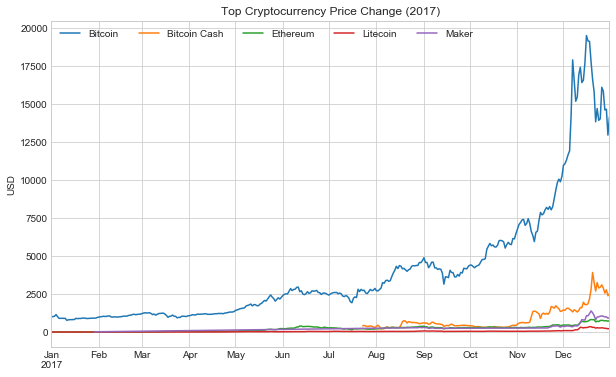

In [11]:
# plot the data
fig, ax = plt.subplots(figsize=(10, 6))
coin_by_date.plot(ax=ax)
coin2_by_date.plot(ax=ax)
coin3_by_date.plot(ax=ax)
coin4_by_date.plot(ax=ax)
coin5_by_date.plot(ax=ax)

ax.legend(['Bitcoin', 'Bitcoin Cash', 'Ethereum', 'Litecoin', 'Maker'], loc='upper left', ncol=5)
ax.set(title='Top Cryptocurrency Price Change (2017)',
        ylabel='USD')

It looks like these cryptos are all experiencing a spike near the end of 2017. However, Bitcoin is significantly higher and price and making the rest of the plot hard to read. Let's isolate the lower 4 cryptocurrencies and take another look.

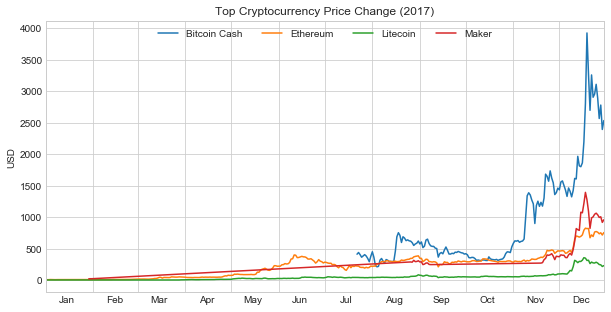

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
coin2_by_date.plot(ax=ax)
coin3_by_date.plot(ax=ax)
coin4_by_date.plot(ax=ax)
coin5_by_date.plot(ax=ax)

# Add labels to the plot
ax.legend(['Bitcoin Cash', 'Ethereum', 'Litecoin', 'Maker'], loc='upper center', ncol=4)

style = dict(size=10, color='gray')

#ax.text('2017-1-1', 5, "New Year's Day", **style)
#ax.text('2017-7-4', 5, "Independence Day", ha='center', **style)
#ax.text('2017-9-4', 5, "Labor Day", ha='center', **style)
#ax.text('2017-12-25', 4.5, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='Top Cryptocurrency Price Change (2017)',
        ylabel='USD')


# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

The cryptocurrencies during 2017 appear to follow the same trends in price change. With significant spikes specifically in December.

#### Future research

As for a future research project on this dataset, I propose to drill down and analyze a single cryptocurrency by itself and in conjunction with external factors. The data science techniques I'd like to learn how to perform better in the Bootcamp are forecasting and Causation vs Correlation.

It looks like the price of Bitcoin in 2019 is going back up like it did in 2017.

So I would focus in on Bitcoin:
- What is a forecast for the rest of 2019?
- What is the best day of the week to sell?
- What is the best day of the week to buy?

External Factors:
- Does unemployment have an effect on Bitcoin price?
- Does the strength of the USD have an effect on Bitcoin price?
- Does homeownership have an effect on Bitcoin price?